<a href="https://colab.research.google.com/github/park-geun-hyeong/TimeSeries/blob/main/Preprocessing/MissingValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.metrics import r2_score

sns.set_style("whitegrid")

In [46]:
df = pd.read_csv('./SampleData.csv')
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [47]:
df.Date = pd.to_datetime(df.Date, format = "%d-%m-%Y")
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [48]:
 df = df.assign(missing = np.nan)
 df.missing[df.target.isna() == True] = df.reference
 df

,reference,target,missing
Date,,,
2010-01-15,12.000000,12.000000,NaN
2010-02-15,18.000000,18.000000,NaN
2010-03-15,22.000000,22.000000,NaN
2010-04-15,26.000000,26.000000,NaN
2010-05-15,31.000000,NaN,31.0
...,...,...,...
2017-08-15,44.550281,44.550281,NaN
2017-09-15,31.099088,31.099088,NaN
2017-10-15,26.803926,26.803926,NaN


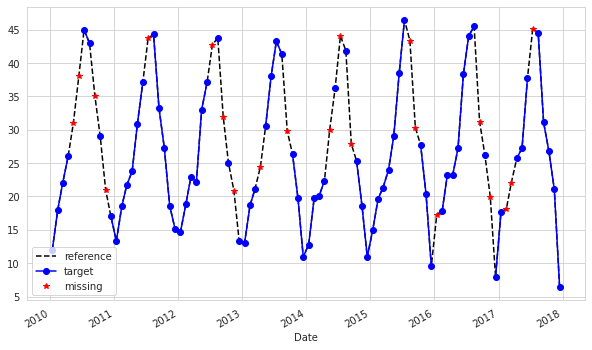

In [49]:
df.plot(style = ['k--', 'bo-', 'r*'], figsize = (10,6))

## Mean

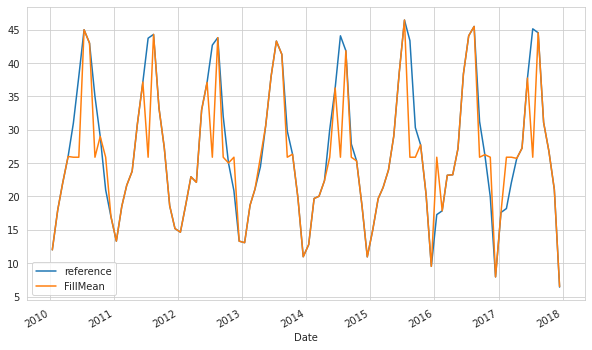

In [51]:
df = df.assign(FillMean = df.target.fillna(df.target.mean()))
df[['reference', 'FillMean']].plot(figsize= (10,6))

## Median

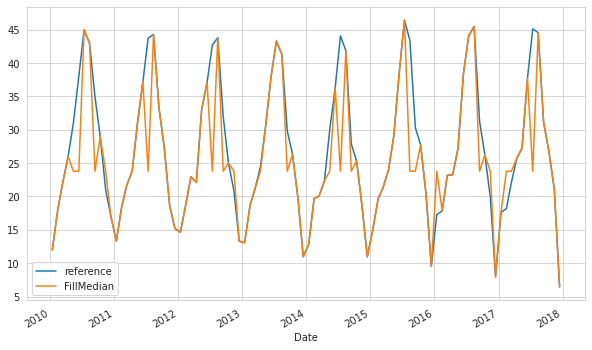

In [52]:
df = df.assign(FillMedian = df.target.fillna(df.target.median()))
df[['reference', 'FillMedian']].plot(figsize= (10,6))

## LOCF

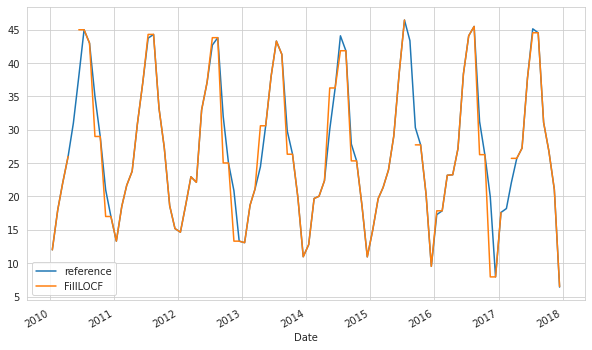

In [53]:
df = df.assign(FillLOCF = df.target.fillna(df.target.shift(-1)))
df[['reference', 'FillLOCF']].plot(figsize= (10,6))

## Moving Average

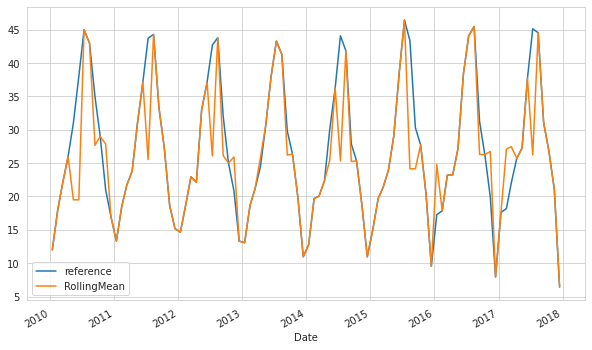

In [54]:
df = df.assign(RollingMean = df.target.fillna(df.target.rolling(24, min_periods = 1,).mean()))
df[['reference', 'RollingMean']].plot(figsize= (10,6))

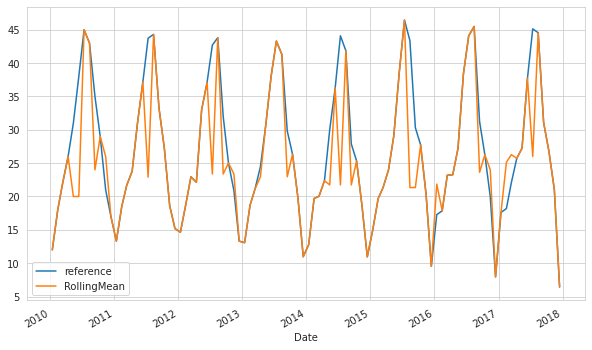

In [55]:
df = df.assign(RollingMean = df.target.fillna(df.target.rolling(24, min_periods = 1,).median()))
df[['reference', 'RollingMean']].plot(figsize= (10,6))

## Interpolation

In [56]:
df = df.assign(interpolateLinear = df.target.interpolate(method = 'linear'))
df = df.assign(interpolateTime = df.target.interpolate(method = 'time'))
df = df.assign(interpolateQuardaratic = df.target.interpolate(method = 'quadratic'))
df = df.assign(interpolateCubic = df.target.interpolate(method = 'cubic'))
df = df.assign(interpolateSLinear = df.target.interpolate(method = 'slinear'))
df = df.assign(interpolateAkima = df.target.interpolate(method = 'akima'))
df = df.assign(interpolatePoly5 = df.target.interpolate(method = 'polynomial', order = 5))
df = df.assign(interpolatePoly7 = df.target.interpolate(method = 'polynomial', order = 7))
df = df.assign(interpolateSpline3 = df.target.interpolate(method = 'spline', order = 3))
df = df.assign(interpolateSpline4 = df.target.interpolate(method = 'spline', order = 4))
df = df.assign(interpolateSpline5 = df.target.interpolate(method = 'spline', order = 5))

In [57]:
result =[(method, round(r2_score(df.reference, df[method]),6)) for method in list(df)[7:]]
result_df = pd.DataFrame(np.array(result), columns = ['method', 'r2_score'])
result_df.sort_values(by = 'r2_score', ascending = False)

,method,r2_score
5,interpolateAkima,0.981684
1,interpolateTime,0.981566
4,interpolateSLinear,0.981566
0,interpolateLinear,0.981322
2,interpolateQuardaratic,0.966347
8,interpolateSpline3,0.963384
3,interpolateCubic,0.963322
6,interpolatePoly5,0.954158
10,interpolateSpline5,0.951671
7,interpolatePoly7,0.950437


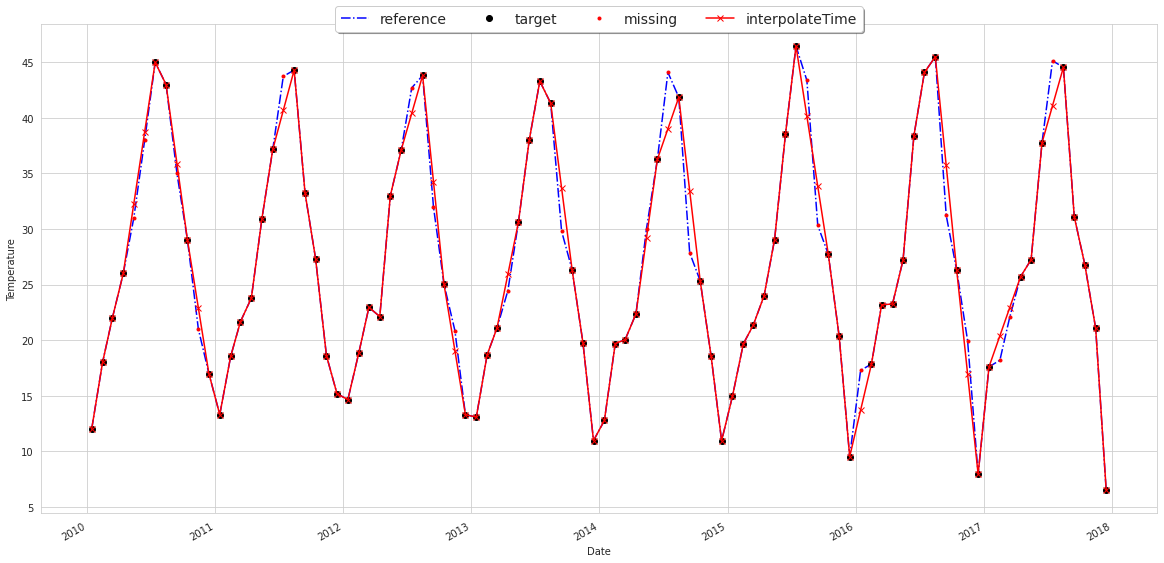

In [58]:
final = df[['reference', 'target', 'missing', 'interpolateTime']]
final.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10))
plt.ylabel('Temperature')
plt.legend(loc='upper center', bbox_to_anchor = (0.5, 1.05), fancybox= True, shadow = True, ncol = 5, prop = {'size': 14})